# Machine Learning Homework 5 - Final Project

### Submission By:  
<ul>
    <li>Akshay Prakash Tambe (apt321@nyu.edu)</li>
    <li>Snahil Singh (ss11381@nyu.edu)</li>
</ul>

## Data Loading

In [1167]:
# Import Packages
import pandas as pd
import numpy as np

In [1168]:
def data_load():
    # Loading Comma Seperated Data using read_table pandas function in 'census_train_data' and 'census_test_data' dataframe
    census_train_data= pd.read_csv('census_train.csv')
    census_test_data = pd.read_csv('census_test.csv')

    # Adding Headers to Data
    census_train_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                                 "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                                 "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                                 "degreefield", "industryworkedin", "wages"]

    census_test_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                                 "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                                 "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                                 "degreefield", "industryworkedin"]

    # Add Wages column to test dataset for consistency
    census_test_data['wages'] = 0
    frames = [census_train_data, census_test_data]
    df = pd.concat(frames)
    df.shape
    return census_train_data, census_test_data, df

## Data Cleaning

In [1169]:
def cleaning(data):
    
    # Cleaning workerclass -  Filling it with zero's (New Category) as the description represents a different class from others
    data['workerclass'] = data['workerclass'].replace('?', 0)
    
    # Cleaning traveltimetowork - Filling it with zero's (New Category) as worker who works from home will never travel, 
    # Same applies to a worker who never worked.
    data['traveltimetowork'] = data['traveltimetowork'].replace('?', 0)

    # ******Cleaning vehicleoccupancy - Filling it with zero's (New Category) for now*******
    data['vehicleoccupancy'] = data['vehicleoccupancy'].replace('?', 0)

    # Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
    data['meansoftransport'] = data['meansoftransport'].replace('?', 0)

    # Cleaning schoolenrollment - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
    # 0 - No, less than 3 years
    data['schoolenrollment'] = data['schoolenrollment'].replace('?', 0)

    # Cleaning educationalattain - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
    # 1 - No Education Attainment, less than 3 years
    data['educationalattain'] = data['educationalattain'].replace('?', 1)

    # Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
    data['workarrivaltime'] = data['workarrivaltime'].replace('?', 0)

    # Cleaning hoursworkperweek - Filling it with zero's (New Category) for non-worker
    data['hoursworkperweek'] = data['hoursworkperweek'].replace('?', 0)

    # Cleaning degreefield - Filling it with 1111 (New Category) for unknown degree
    # 1000, less than bachelor's degree (Related to educationattain)
    data['degreefield'] = data['degreefield'].replace('?', 1000)

    # Cleaning industryworkedin - Filling it with 1111 (New Category) for unknown degree
    # 100, less than 16 years old/not in labor force who last worked more than 5 years ago or never worked
    data['industryworkedin'] = data['industryworkedin'].replace('?', 100)
    
    # Convert the categories feature to type 'category'
    data['workerclass'] = data['workerclass'].astype('category')
    data['vehicleoccupancy'] = data['vehicleoccupancy'].astype('category')
    data['meansoftransport'] = data['meansoftransport'].astype('category')
    data['marital'] = data['marital'].astype('category')
    data['schoolenrollment'] = data['schoolenrollment'].astype('category')
    data['educationalattain'] = data['schoolenrollment'].astype('category')
    data['sex'] = data['sex'].astype('category')
    data['workarrivaltime'] = data['workarrivaltime'].astype('category')
    data['ancestry'] = data['ancestry'].astype('category')
    data['degreefield'] = data['degreefield'].astype('category')
    data['industryworkedin'] = data['industryworkedin'].astype('category')
    
    # Convert numerical features to type 'int64'
    data['idnum'] = data['idnum'].astype(int)
    data['age'] = data['age'].astype(int)
    data['interestincome'] = data['interestincome'].astype(int)
    data['traveltimetowork'] = data['traveltimetowork'].astype(int)
    data['hoursworkperweek'] = data['hoursworkperweek'].astype(int)
    data['wages'] = data['wages'].astype(int)
        
    return data

In [1170]:
def data_drop(data, columns):
    if columns is not None:
        data = data.drop(columns ,axis=1)
    return data

In [1171]:
census_train_data, census_test_data, df = data_load()
# Perform Data Cleaning
clean_data = cleaning(df)

# Drop Columns
columns = ['idnum']
clean_data = data_drop(clean_data, columns)
df = clean_data
df.head(5)

,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin,wages
0,34,3,0,10,1,1,5,1,1,1,168,40,51,1000,7860,34500
1,57,2,0,15,8,1,5,1,1,1,100,30,51,1000,8390,4700
2,17,0,0,0,0,0,5,2,2,2,0,0,714,1000,100,0
3,42,1,0,20,1,1,1,1,1,1,92,45,21,5001,6990,120000
4,18,0,0,0,0,0,5,2,2,2,0,0,999,1000,100,0


In [1172]:
# From our combined we get back our train & test datasets
train = df[:1183]
test = df[1183:]

#---------------------
# Drop Age less than 16
#train = train.loc[train.age >= 16,:]
#---------------------
print(train.shape)
print(test.shape)

# Combine train and test so we can continue performing other operations on the whole dataset
frames = [train, test]
df = pd.concat(frames)
print(df.shape)

# Make sure there is no null value in the target feature
np.where(np.isnan(df['wages']))

(1183, 16)
(499, 16)
(1682, 16)


(array([], dtype=int64),)

## Data Transformation - Scaling and One-Hot Encoding

## Scaling

In [1173]:
from sklearn.preprocessing import StandardScaler

def perform_scaling(df):
    # Get all numeric features
    numerical_features = []
    for feature in df.dtypes.index:
        # Exclude the target variable 'wages' and 'idnum' column    
        if (df[feature].dtype != np.object) and (str(df[feature].dtype) != 'category') \
                and (feature != 'wages') and (feature != 'idnum'):
            numerical_features.append(feature)

    print(numerical_features)
    
    # Perform Standard Scaling for numerical features only
    scaler = StandardScaler()

    # Again, from our combined df we get back our train & test datasets
    train = df[:1183]
    test = df[1183:]

    train.loc[:,numerical_features] = scaler.fit_transform(train[numerical_features])
    test.loc[:,numerical_features] = scaler.transform(test[numerical_features])

    # Combine train and test so we can continue performing other operations on the whole dataset
    frames = [train, test]
    df = pd.concat(frames)

    return df

In [1174]:
df = perform_scaling(df)
df.head(5)

['age', 'interestincome', 'traveltimetowork', 'hoursworkperweek']


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin,wages
0,-0.701676,3,-0.123582,-0.275096,1,1,5,1,1,1,168,0.795301,51,1000,7860,34500
1,0.444641,2,-0.123582,-0.072684,8,1,5,1,1,1,100,0.321874,51,1000,8390,4700
2,-1.548954,0,-0.123582,-0.679921,0,0,5,2,2,2,0,-1.098406,714,1000,100,0
3,-0.302957,1,-0.123582,0.129729,1,1,1,1,1,1,92,1.032014,21,5001,6990,120000
4,-1.499114,0,-0.123582,-0.679921,0,0,5,2,2,2,0,-1.098406,999,1000,100,0


In [1175]:
# Make sure there is no null value in the target feature
np.where(np.isnan(df['wages']))

(array([], dtype=int64),)

## One-Hot Encoding

In [1176]:
def perform_one_hot_encoding(df):
    # Get all categorical features
    categorical_features = []
    for feature in df.dtypes.index:
        if (str(df[feature].dtype) == 'category'):
            categorical_features.append(feature)

    print(categorical_features)
    
    # Perform One-Hot Encoding
    df_dummies = pd.get_dummies(df[categorical_features])
    df = df.drop(df[categorical_features],axis=1)
    df = pd.concat([df, df_dummies],axis=1)
    return df

In [1177]:
df = perform_one_hot_encoding(df)
df.head(5)

['workerclass', 'vehicleoccupancy', 'meansoftransport', 'marital', 'schoolenrollment', 'educationalattain', 'sex', 'workarrivaltime', 'ancestry', 'degreefield', 'industryworkedin']


,age,interestincome,traveltimetowork,hoursworkperweek,wages,workerclass_0,workerclass_1,workerclass_2,workerclass_3,workerclass_4,...,industryworkedin_9470,industryworkedin_9480,industryworkedin_9490,industryworkedin_9570,industryworkedin_9590,industryworkedin_9670,industryworkedin_9680,industryworkedin_9770,industryworkedin_9870,industryworkedin_9920
0,-0.701676,-0.123582,-0.275096,0.795301,34500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.444641,-0.123582,-0.072684,0.321874,4700,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.548954,-0.123582,-0.679921,-1.098406,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.302957,-0.123582,0.129729,1.032014,120000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.499114,-0.123582,-0.679921,-1.098406,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1178]:
# For the last time, from our combined df we get back our train & test datasets.
train = df[:1183]#1183
test = df[1183:]

test = test.drop(['wages'],axis=1)

print(train.shape)
print(test.shape)

(1183, 614)
(499, 613)


## Modeling

In [1179]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(actual, predictions):
    predictions = np.round(predictions/100)*100
    mse = mean_squared_error(actual, predictions)
    return sqrt(mse)

In [1180]:
def plot_info(res, title):
    
    feat = res.keys()
    imp = res.values()
    # Plotting Feature_Names on X-Axis and Feature_importances on Y-Axis
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(feat)), imp)
    plt.xticks(range(len(feat)), feat, rotation=40)
    plt.xlabel('Feature Name')
    plt.ylabel('Feature Importance')
    plt.title(title)
    plt.show()

In [1181]:
# Seperating features and labels
X = train.drop(['wages'],axis=1)
y = train['wages']

from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

dis_mutual_info = mutual_info_regression(X, y, copy = True)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


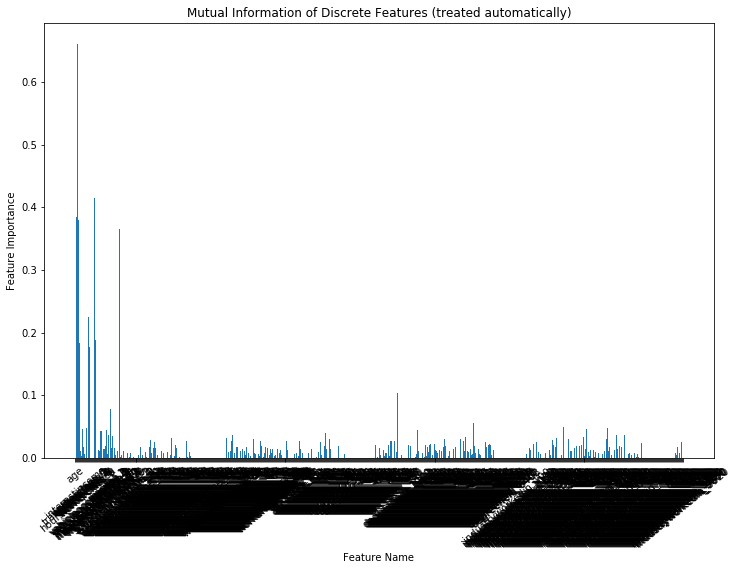

In [1182]:
dis_res = dict(zip(X.columns.values, dis_mutual_info))
plot_info(dis_res, "Mutual Information of Discrete Features (treated automatically)")

In [1183]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(mutual_info_regression, k=34)
kbest.fit(X, y)
top_features = kbest.get_support(indices=True)
top_features

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([  0,   2,   3,   4,   5,   8,  12,  14,  15,  20,  21,  32,  36,
        44,  45,  46, 116, 145, 149, 223, 233, 325, 345, 378, 431, 435,
       442, 483, 514, 546, 549, 563, 598, 602])

In [1184]:
X = X.iloc[:,top_features]
X

,age,traveltimetowork,hoursworkperweek,workerclass_0,workerclass_1,workerclass_4,workerclass_8,vehicleoccupancy_0,vehicleoccupancy_1,meansoftransport_0,...,degreefield_6211,industryworkedin_100,industryworkedin_1680,industryworkedin_4490,industryworkedin_5680,industryworkedin_7370,industryworkedin_7460,industryworkedin_7860,industryworkedin_9190,industryworkedin_9390
0,-0.701676,-0.275096,0.795301,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.444641,-0.072684,0.321874,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.548954,-0.679921,-1.098406,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,-0.302957,0.129729,1.032014,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.499114,-0.679921,-1.098406,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
5,0.943039,-0.679921,-0.956378,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,-1.349594,-0.679921,-1.098406,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,-1.499114,-0.477508,-0.624979,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.253117,1.344203,0.037818,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.740477,-0.679921,-1.098406,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [1185]:
from sklearn.model_selection import train_test_split

# Train-Test Split 1,14,28,34,41,42
x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=29))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [1290]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import cross_val_score

# Initialize different regression algorithms
linear_reg = LinearRegression()
ridge = Ridge()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
KNN = KNeighborsRegressor()
SVM = SVR()
Ensembled_model = BaggingRegressor()

models = [linear_reg, ridge, decision_tree, random_forest, KNN, SVM, Ensembled_model]
model_name = ['linear_reg', 'ridge', 'decision_tree', 'random_forest', 'KNN', 'SVR', 'BaggingRegressor']
scorer = make_scorer(r2_score)
result = {}

for name, model in enumerate(models):
    # Fit the Model
    model.fit(x_train, y_train)

    # Get the Scores
    train_score = model.score(x_train, y_train)
    cv_score = cross_val_score(model, x_train, y_train,cv=3, scoring = scorer)
    preds = model.predict(x_test)
    rmse_score = rmse(y_test, preds)

    # Add Results
    name = model_name[name]
    result[name] = [train_score, cv_score.mean(), rmse_score]

for model_scores in result:
    print(model_scores, result[model_scores])

linear_reg [0.3496509597709361, 0.28824186640904637, 41768.58307523342]
ridge [0.3470100533195716, 0.2960008882240596, 41232.87171150543]
decision_tree [0.9999891629062919, -0.37712682545377835, 66442.07980438597]
random_forest [0.8881862421023696, 0.2434151309012735, 51163.48981313877]
KNN [0.4944150740009047, 0.29322801249099006, 47749.14540640757]
SVR [-0.12729546769148548, -0.12731459591762842, 50606.129420551195]
BaggingRegressor [0.8730703121135518, 0.15908899492768358, 53148.380625364225]


## Hyperparameter Tuning

## Random Forest

In [1291]:
from sklearn.model_selection import RandomizedSearchCV
def rf_tuning():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    random_forest = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(x_train, y_train)
    return rf_random.best_params_

In [1292]:
rf_best_params = rf_tuning()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[C

[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   3.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.1s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   3.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   1.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   2.4s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   1.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=600,

[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.9s
[CV] n_estimators=80

[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.2s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.2s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.2s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.2s
[CV] n_estimato

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=100

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.8s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   3.0s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   4.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   3.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=800, 

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   5.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.1s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   4.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800,

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   1.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   1.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   3.9s
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   4.1s
[CV] n_e

[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=  11.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=  13.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   5.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   5.5s
[CV] n_estima

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   8.5s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   9.6s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   8.5s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   4.8s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=14

[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   5.9s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   6.0s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   8.0s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   8.4s
[CV] n_e

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   3.4s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.6min


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   4.0s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   3.9s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   4.0s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   8.7s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min

[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   7.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   0.9s
[CV] n_estimators=200, min_samp

[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   2.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   2.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   2.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   2.2s
[CV] n_estimators=400,

[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   3.1s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   3.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   4.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   6.4s
[CV] n_estimators=600, min_samples_s

[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   7.9s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   7.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=  10.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=   9.9s
[CV]  n_estimators=200

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.6min finished


In [1293]:
rf_best_params

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 600}

## Decision Tree

In [1272]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

def decision_tree_tuning():
    random_grid = {"criterion": ["mse"],
                  "min_samples_split": [10, 20, 40],
                  "max_depth": [2, 6, 8],
                  "min_samples_leaf": [20, 40, 100],
                  "max_leaf_nodes": [5, 20, 100],
                  }

    
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    decision_tree = DecisionTreeRegressor()

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    dt_random = GridSearchCV(estimator = decision_tree, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
    # Fit the random search model
    dt_random.fit(x_train, y_train)
    return dt_random.best_params_

In [1273]:
dt_best_params = decision_tree_tuning()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=2

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_l

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples

[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min

[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=40, min_samp

[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, mi

[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples

[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40

[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.7s finished


In [1274]:
dt_best_params

{'criterion': 'mse',
 'max_depth': 2,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

## Ridge

In [1262]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

def ridge_tuning():
    ridge = RidgeCV(alphas = [ 0.1, 0.5, 1, 5, 10, 15, 20, 25, 30])
    ridge.fit(x_train, y_train)
    alpha = ridge.alpha_
    ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                              alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                              alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 5)
    ridge.fit(x_train, y_train)
    alpha = ridge.alpha_
    return alpha

In [1263]:
ridge_best_params = ridge_tuning()
ridge_best_params

28.0

## Support Vector Regressor

In [1281]:
def svc_param_selection():
    hyperparams = { 
       "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
       "gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
       "C" : [1, 10, 100, 1000]}
    SVM = SVR()
    grid_search = GridSearchCV(estimator=SVM, param_grid=hyperparams, cv=5)
    grid_search.fit(x_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [1282]:
svr_best_params = svc_param_selection()

In [1283]:
svr_best_params

{'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}

In [1284]:
# Using Hyperparameters
# Initialize different regression algorithms
linear_reg = LinearRegression()
ridge = Ridge(alpha = 28.0)
decision_tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 2, max_leaf_nodes = 20,\
                                         min_samples_leaf = 20, min_samples_split = 10)
random_forest = RandomForestRegressor(bootstrap = True, max_depth = 20, max_features = 'sqrt', \
                    min_samples_leaf = 1, min_samples_split = 10, n_estimators = 600)
KNN = KNeighborsRegressor()
SVM = SVR(C=1000, gamma = 0.1, kernel = 'linear')

models = [linear_reg, ridge, decision_tree, random_forest, KNN, SVM]
model_name = ['linear_reg', 'ridge', 'decision_tree','random_forest','KNN', 'SVR']
scorer = make_scorer(r2_score)
result = {}

for name, model in enumerate(models):
    # Fit the Model
    model.fit(x_train, y_train)

    # Get the Scores
    train_score = model.score(x_train, y_train)
    cv_score = cross_val_score(model, x_train, y_train,cv=3, scoring = scorer)
    preds = model.predict(x_test)
    rmse_score = rmse(y_test, preds)

    # Add Results
    name = model_name[name]
    result[name] = [train_score, cv_score.mean(), rmse_score]

for model_scores in result:
    print(model_scores, result[model_scores])

linear_reg [0.3496509597709361, 0.28824186640904637, 41768.58307523342]
ridge [0.33048976244191997, 0.30805414478256604, 39931.846759620355]
decision_tree [0.45131171860968206, 0.40576909379584586, 46630.81115543761]
random_forest [0.6432368507493298, 0.41458783874383043, 37379.80628665923]
KNN [0.4944150740009047, 0.29322801249099006, 47749.14540640757]
SVR [0.18325810545126253, 0.17558529877122378, 37796.290633259276]


In [1190]:
compare_df = pd.DataFrame()
compare_df['actuals'] = y_test
compare_df['predictions'] = np.round(preds/100)*100
compare_df['predictions'] = compare_df['predictions'].astype('int64')
compare_df

,actuals,predictions
611,7000,55900
814,28000,17600
868,0,700
685,189000,103300
185,0,0
1064,55000,103200
684,0,0
1156,50000,30900
453,0,0
395,53000,65100


In [1191]:
compare_df[compare_df['actuals']==0]

,actuals,predictions
868,0,700
185,0,0
684,0,0
453,0,0
1051,0,0
578,0,57500
788,0,0
697,0,400
86,0,0
263,0,0


In [1192]:
compare_df[compare_df['predictions']==0]

,actuals,predictions
185,0,0
684,0,0
453,0,0
1051,0,0
788,0,0
86,0,0
263,0,0
1094,0,0
380,0,0
1098,0,0
